In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [453]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [454]:
#Checking Null Values count and data types
country_df.info()
# No null data in any columns

# Convert income and gdpp to float
country_df['income'] = country_df['income'].astype('float')
country_df['gdpp'] = country_df['gdpp'].astype('float')
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
mem

In [455]:
# Checking Distribution of data types
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [456]:
#Checking If all rows belong to different countries
print(country_df['country'].unique().size)
print(country_df.shape[0])

# No issues with Data

167
167


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.20,55.0,5.20,399.0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.39,56.5,6.59,897.0


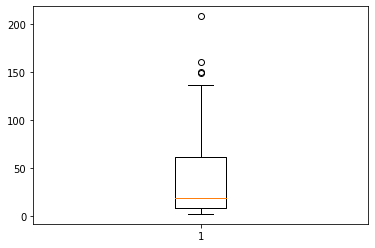

In [457]:
# Univariate Analysis
# We will not remove outlier right away.. We will just flag out countries in each column which are an exception.
# Later after visualisation, we will remove some outliers if needed

#child_mort
plt.boxplot(country_df['child_mort'])

#3 countries with higher mortality rate
country_df[country_df['child_mort']>=150].sort_values('child_mort',ascending = False)

# Chad, Haiti and Sierra Leone has high Mortality Rate
# Haiti has expectionally high Mortality rate.. Lets see if Haiti helds up expectionally high in other fields as well

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000.0,6.980,79.5,2.07,70300.0
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
23,Brunei,10.5,67.4,2.84,28.0,80600.0,16.700,77.1,1.84,35300.0
82,Kuwait,10.8,66.7,2.63,30.4,75200.0,11.200,78.2,2.21,38500.0
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
114,Norway,3.2,39.7,9.48,28.5,62300.0,5.950,81.0,1.95,87800.0
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600.0,12.500,76.5,1.87,35000.0
145,Switzerland,4.5,64.0,11.50,53.3,55500.0,0.317,82.2,1.52,74600.0


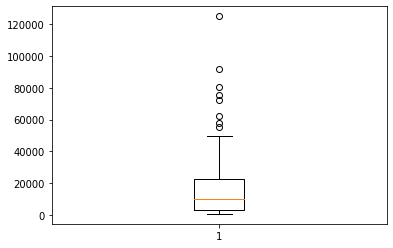

In [458]:
#Income
plt.boxplot(country_df['income'])
country_df[country_df['income']>50000].sort_values('income',ascending = False)
#Qatar has exceptionally high Income .. 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
114,Norway,3.2,39.7,9.48,28.5,62300.0,5.950,81.0,1.95,87800.0
145,Switzerland,4.5,64.0,11.50,53.3,55500.0,0.317,82.2,1.52,74600.0
123,Qatar,9.0,62.3,1.81,23.8,125000.0,6.980,79.5,2.07,70300.0


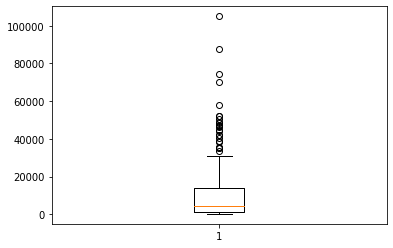

In [459]:
#gdpp
plt.boxplot(country_df['gdpp'])
country_df[country_df['gdpp']>60000].sort_values('gdpp',ascending = False)
#Luxembourg has exceptionally gdpp .. 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
98,Malta,6.8,153.0,8.65,154.0,28300.0,3.830,80.3,1.36,21100.0
73,Ireland,4.2,103.0,9.19,86.5,45700.0,-3.220,80.4,2.05,48700.0
131,Seychelles,14.4,93.8,3.40,108.0,20400.0,-4.210,73.4,2.17,10800.0


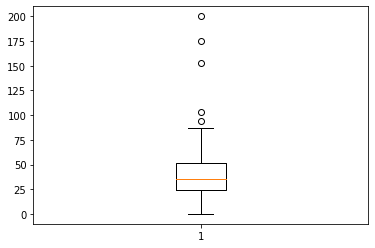

In [460]:
#exports
plt.boxplot(country_df['exports'])
country_df[country_df['exports']>90].sort_values('exports',ascending = False)

# Singapore, Luxembourg and Malta has exceptionally high Exports

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400.0,1.22,78.7,1.93,48400.0
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340.0,3.80,65.4,3.46,2860.0


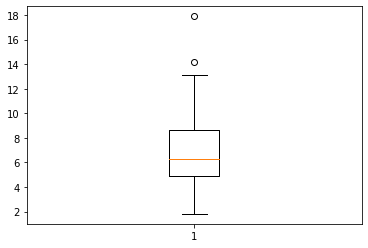

In [461]:
#Health
plt.boxplot(country_df['health'])
country_df[country_df['health']>14].sort_values('health',ascending = False)

# US has exceptionally high Health Ratings

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
98,Malta,6.8,153.0,8.65,154.0,28300.0,3.830,80.3,1.36,21100.0
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
131,Seychelles,14.4,93.8,3.40,108.0,20400.0,-4.210,73.4,2.17,10800.0
87,Lesotho,99.7,39.4,11.10,101.0,2380.0,4.150,46.5,3.30,1170.0


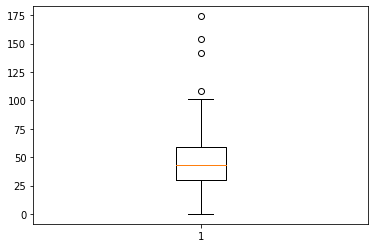

In [462]:
#imports
plt.boxplot(country_df['imports'])
country_df[country_df['imports']>100].sort_values('imports',ascending = False)

# Singapore has exceptionally high imports

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150.0,104.0,60.5,5.84,2330.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.9,75.4,2.47,13500.0
103,Mongolia,26.1,46.7,5.44,56.7,7710.0,39.2,66.2,2.64,2650.0


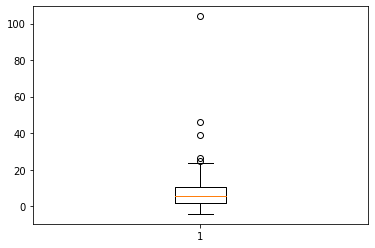

In [463]:
#inflation
plt.boxplot(country_df['inflation'])
country_df[country_df['inflation']>35].sort_values('inflation',ascending = False)

# Nigeria has exceptionally high Inflation

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0
87,Lesotho,99.7,39.4,11.10,101.0,2380.0,4.15,46.5,3.30,1170.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0


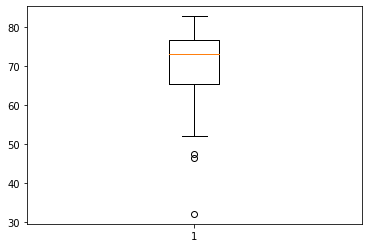

In [464]:
#life_expec
plt.boxplot(country_df['life_expec'])
country_df[country_df['life_expec']<50].sort_values('life_expec',ascending = True)

# Haiti has exceptionally Low Life Expectancy Rate

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.2,5.16,49.1,814.0,2.55,58.8,7.49,348.0


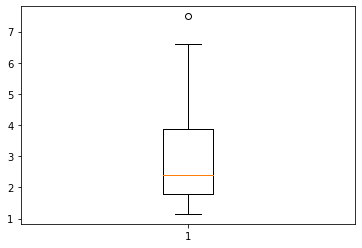

In [465]:
#total_fer
plt.boxplot(country_df['total_fer'])
country_df[country_df['total_fer']>7].sort_values('total_fer',ascending = False)

# Niger has exceptionally high total fertility rate

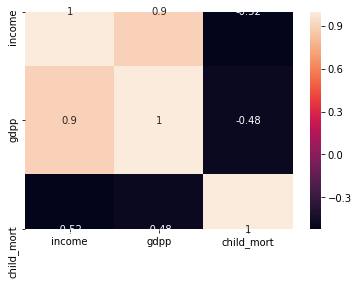

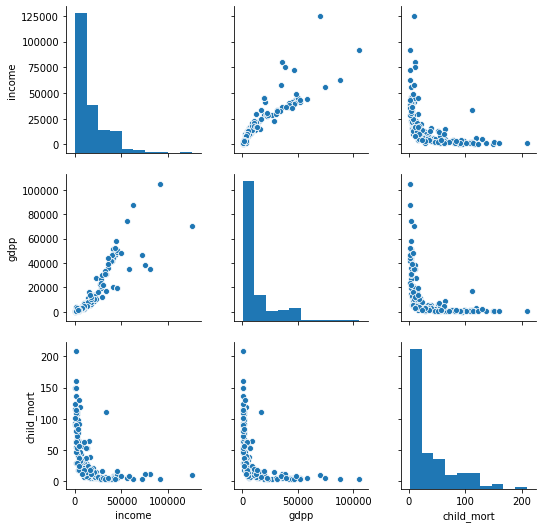

In [466]:
# Some Exceptional Countries Based on Income, GDPP and Child Mortality Rate are
#Haiti  - Child Mortality
#Luxembourg, Qatar - Income
#Luxembourg , Norway - Gdpp

# lets Plot a scatterplot and see the variation between 3 important Variables

# Bivariate Analysis

scatter_df = country_df[['income','gdpp','child_mort']]
sns.heatmap(scatter_df.corr(),annot = True)
sns.pairplot(scatter_df)

# income and gdpp are highly correlated
# child mortality decreases as income increases


In [467]:
# Outlier Analysis
# Lets remove countries with very high income and gdpp because these countries are in a better conditon and might not lie in top 5
# Also they will skew the analysis as these are outliers
# For child mortality rates, higher values countries are actually country. 
# In case outliers does not skew analysis, lets cap the high values to the next  high values

# Child Mortality Rate
#lets cap mortality rate of Haiti to the second best value
# Second best value = 160
country_df.loc[66,'child_mort']  = 160

In [468]:
# income

# Cap Qatar Income to the 2nd Highest Value
# Second Highest Income = 91700.0
country_df.loc[123,'income']  = 91700

In [469]:
#gdpp
# Its better to remove Luxembourg from analysis because it has a very high index for almost everything 
#Like Income , gdpp etc

country_df = country_df.drop(index = 91)

In [470]:
#exports

# Its better to remove Singapore since it has exceptional exports and hence better conditions
country_df.drop(index = 133,axis = 0,inplace  = True)

In [471]:
# Health 
# Cap the highest value of US to second highest value
#second highest value = 14.2
country_df.loc[159,'health']  = 14.2

In [472]:
#imports
# Cap the imports of Malta to second highest value
# Second highest value = 108.0
country_df.loc[98,'imports']  = 108

In [473]:
#inflation
# Cap the inflation of Nigeria to second highest value
# Second highest value = 45.9
country_df.loc[113,'imports']  = 45.9

In [474]:
# Life Expectancy
# Cap the life expectancy of Haiti to second lowest value
# Second highest value = 46.5

country_df.loc[66,'life_expec']  = 46.5


In [475]:
#inflation
# Cap the inflation of Nigeria to second lowest value
# Second highest value = 45.9

country_df.loc[113,'inflation']  = 45.9


In [476]:
#total_fer
# Cap the inflation of total_fer to second lowest value
# Second highest value = 6.59

country_df.loc[112,'total_fer']  = 6.59

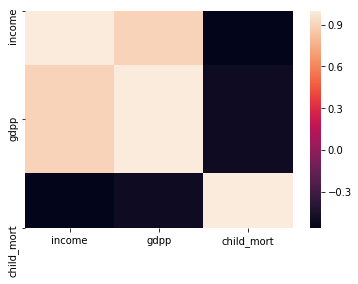

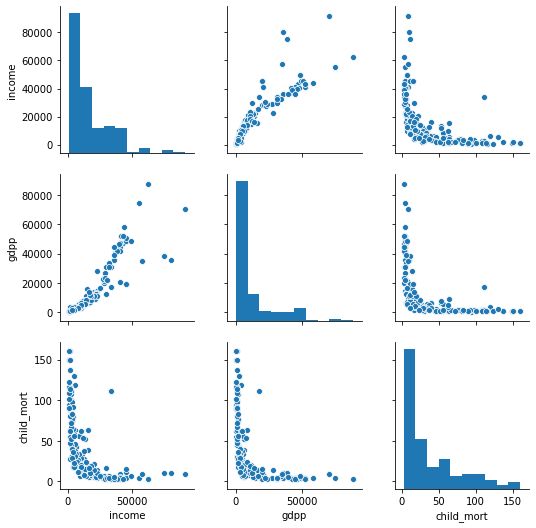

In [477]:
# Check Scatter Plot and Correlation Again
scatter_df = country_df[['income','gdpp','child_mort']]
sns.heatmap(scatter_df.corr())
sns.pairplot(scatter_df)

In [478]:
country_df_copy = country_df.copy()
country_df =  country_df.drop('country',axis = 1)

In [479]:
# rescaling the model
# instantiate
#country_df = country_df.drop('country',axis = 1)
#scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_df)
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns =['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
print(country_df_scaled.shape)
country_df_scaled.head()

(165, 9)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.321376,-1.323623,0.290490,-0.027471,-0.863084,0.241151,-1.679761,1.913971,-0.697184
1,-0.556430,-0.511433,-0.095475,0.161679,-0.369485,-0.374911,0.680601,-0.878040,-0.485506
2,-0.283434,-0.042168,-0.987315,-0.717614,-0.193284,1.070033,0.704088,-0.047802,-0.463363
3,2.056170,1.036239,-1.481949,-0.129715,-0.608572,1.854111,-1.221780,2.141617,-0.519020
4,-0.717166,0.278196,-0.290331,0.688233,0.174542,-0.754504,0.739317,-0.556657,-0.000150


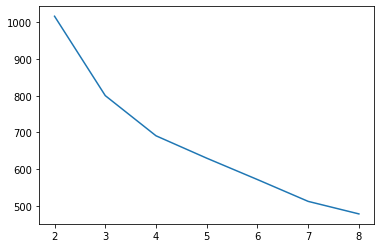

In [480]:
#Modelling
#K-Means
# Finding Optimal Number of Clusters
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters,ssd)

For n_clusters=2, the silhouette score is 0.28002413201508863
For n_clusters=3, the silhouette score is 0.2714153235322632
For n_clusters=4, the silhouette score is 0.24034469103797423
For n_clusters=5, the silhouette score is 0.22574981122214988
For n_clusters=6, the silhouette score is 0.25698891666442936
For n_clusters=7, the silhouette score is 0.23756303829949654
For n_clusters=8, the silhouette score is 0.24189220052812538


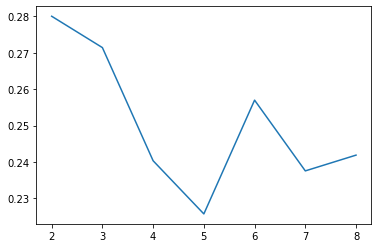

In [481]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_list = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    silhouette_list.append(silhouette_avg)
plt.plot(range_n_clusters,silhouette_list)
    
    

In [482]:
# Based on the 2 analysis, we can either keep K=3 or K=4
# Lets Keep K=3
kmeans = KMeans(n_clusters=3, max_iter=100, random_state = 42)
kmeans.fit(country_df_scaled)

# assign the label
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [483]:
country_df.cluster_id = country_df.cluster_id +1

In [484]:
# Countries in each cluster
country_df['cluster_id'].value_counts().reset_index().sort_values('index')

,index,cluster_id
1,1,47
0,2,83
2,3,35


   cluster_id        income
0           1   3738.574468
1           2  12293.373494
2           3  42000.000000


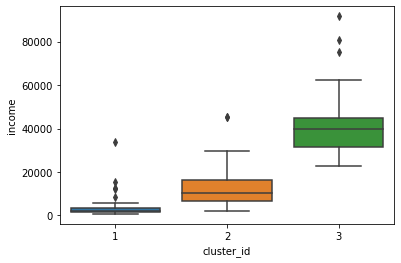

In [485]:
# Avg of clusters based on income
print(country_df.pivot_table(index= 'cluster_id', values=['income'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with highest income
# plot
sns.boxplot(x='cluster_id', y='income', data=country_df)

   cluster_id  child_mort
0           1   92.193617
1           2   21.881928
2           3    5.377143


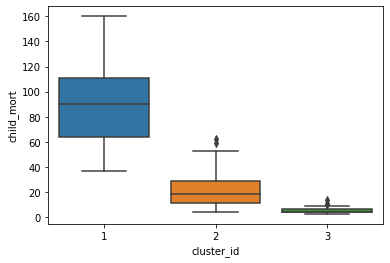

In [486]:
# Avg of clusters based on child mortality
print(country_df.pivot_table(index= 'cluster_id', values=['child_mort'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with lowest mortality rate
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)

   cluster_id          gdpp
0           1   1808.297872
1           2   6291.855422
2           3  40177.142857


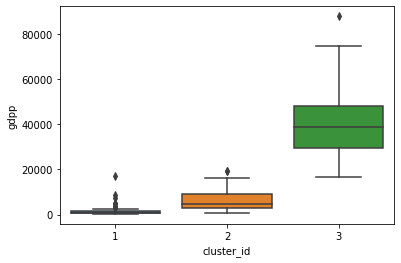

In [487]:
# Avg of clusters based on gdpp
print(country_df.pivot_table(index= 'cluster_id', values=['gdpp'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with highest gdpp
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)

   cluster_id    health
0           1  6.253830
1           2  6.256867
2           3  8.844000


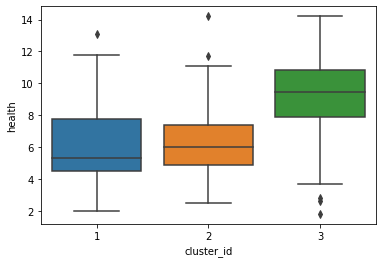

In [488]:
# Avg of clusters based on health
print(country_df.pivot_table(index= 'cluster_id', values=['health'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with highest health index and median value is lowest for cluster1
# plot
sns.boxplot(x='cluster_id', y='health', data=country_df)

   cluster_id    exports
0           1  28.225936
1           2  40.831084
2           3  50.702857


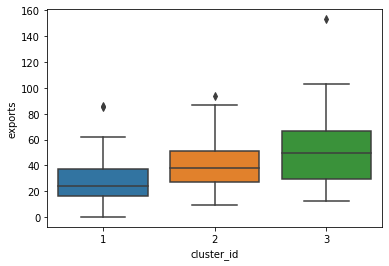

In [489]:
# Avg of clusters based on exports
print(country_df.pivot_table(index= 'cluster_id', values=['exports'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with highest exports and cluster1 with lowest exports
# plot
sns.boxplot(x='cluster_id', y='exports', data=country_df)

   cluster_id    imports
0           1  41.839700
1           2  48.136145
2           3  43.868571


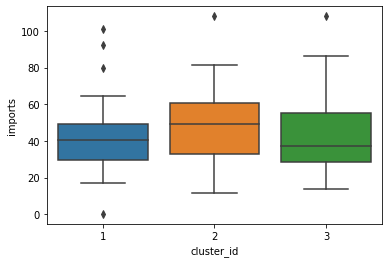

In [490]:
# Avg of clusters based on imports
print(country_df.pivot_table(index= 'cluster_id', values=['imports'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with lowest imports and cluster 2 with highest imports
# plot
sns.boxplot(x='cluster_id', y='imports', data=country_df)

   cluster_id  inflation
0           1  10.743511
1           2   7.719867
2           3   2.634229


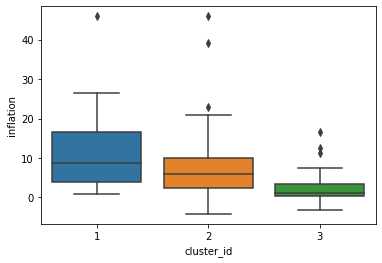

In [491]:
# Avg of clusters based on inflation
print(country_df.pivot_table(index= 'cluster_id', values=['inflation'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with lowest inflation and cluster 1 with lowest inflation
# plot
sns.boxplot(x='cluster_id', y='inflation', data=country_df)

   cluster_id  life_expec
0           1   59.700000
1           2   72.685542
2           3   79.840000


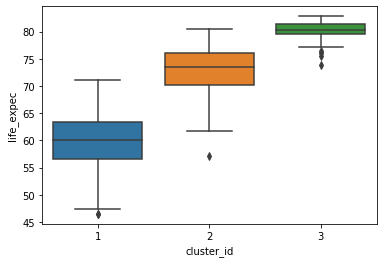

In [492]:
# Avg of clusters based on life_expec
print(country_df.pivot_table(index= 'cluster_id', values=['life_expec'],aggfunc = np.mean).reset_index().head(10))
# Cluster 3 has Countries with exceptionally high life expectancy and cluster1 with lowest life expectancy
# plot
sns.boxplot(x='cluster_id', y='life_expec', data=country_df)

   cluster_id  total_fer
0           1   4.978936
1           2   2.318554
2           3   1.776571


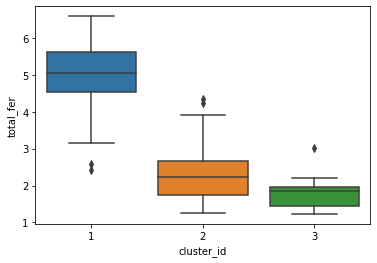

In [493]:
# Avg of clusters based on total_fer
print(country_df.pivot_table(index= 'cluster_id', values=['total_fer'],aggfunc = np.mean).reset_index().head(10))
# Cluster 1 has Countries with exceptionally high fertility rate and cluster3 with lowest fertility rate
# plot
sns.boxplot(x='cluster_id', y='total_fer', data=country_df)

In [494]:
# Cluster 1 has lowest gdpp and income,health index,life expectancy and highest mortality rate, fertility rate and inflation
# Hence the countries within those clusters require the most funds from the NGO

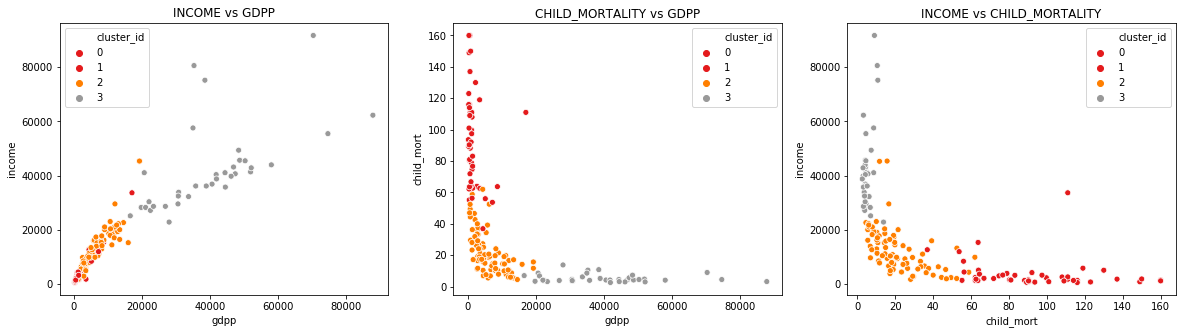

In [495]:
# Plotting Cluster Level Scatter Plot
fig,axes = plt.subplots(1, 3,figsize=(20,5))
sns.scatterplot(y='income',x = 'gdpp',data = country_df,ax = axes[0],hue = 'cluster_id',palette="Set1")
axes[0].set_title('INCOME vs GDPP')
sns.scatterplot(y='child_mort',x = 'gdpp',data = country_df,ax = axes[1],hue = 'cluster_id',palette="Set1")
axes[1].set_title('CHILD_MORTALITY vs GDPP') 
sns.scatterplot(y='income',x = 'child_mort',data = country_df,ax = axes[2],hue = 'cluster_id',palette="Set1")
axes[2].set_title('INCOME vs CHILD_MORTALITY')
plt.show()

In [496]:
# Lets try the same thing out with K = 4
country_df_v2 = country_df.copy()

In [497]:
kmeans = KMeans(n_clusters=4, max_iter=100, random_state = 42)
kmeans.fit(country_df_scaled)

# assign the label
country_df_v2['cluster_id'] = kmeans.labels_
country_df_v2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [498]:
country_df_v2['cluster_id'] = country_df_v2['cluster_id'] + 1

In [499]:
# Countries in each cluster
country_df_v2['cluster_id'].value_counts().reset_index().sort_values('index')

,index,cluster_id
1,1,46
2,2,45
0,3,46
3,4,28


   cluster_id        income
0           1  14451.521739
1           2   3493.177778
2           3  12586.956522
3           4  45182.142857


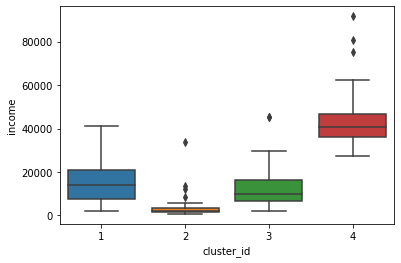

In [500]:
# Avg of clusters based on income
print(country_df_v2.pivot_table(index= 'cluster_id', values=['income'],aggfunc = np.mean).reset_index().head(10))
# Cluster 4 has Countries with highest income
# plot
sns.boxplot(x='cluster_id', y='income', data=country_df_v2)

   cluster_id  child_mort
0           1   16.630435
1           2   93.791111
2           3   26.317391
3           4    5.046429


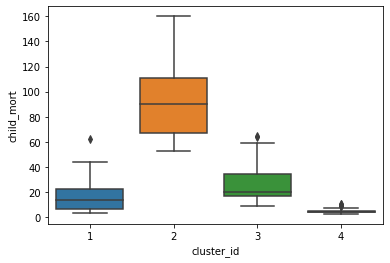

In [501]:
# Avg of clusters based on child mortality
print(country_df_v2.pivot_table(index= 'cluster_id', values=['child_mort'],aggfunc = np.mean).reset_index().head(10))
# Cluster 4 has Countries with lowest mortality rate
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=country_df_v2)

   cluster_id          gdpp
0           1   8647.086957
1           2   1713.377778
2           3   6174.913043
3           4  44803.571429


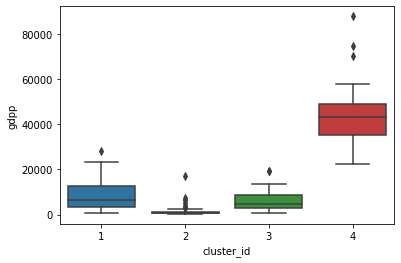

In [502]:
# Avg of clusters based on gdpp
print(country_df_v2.pivot_table(index= 'cluster_id', values=['gdpp'],aggfunc = np.mean).reset_index().head(10))
# Cluster 4 has Countries with highest gdpp
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=country_df_v2)

Text(0.5, 1.0, 'INCOME vs CHILD_MORTALITY')

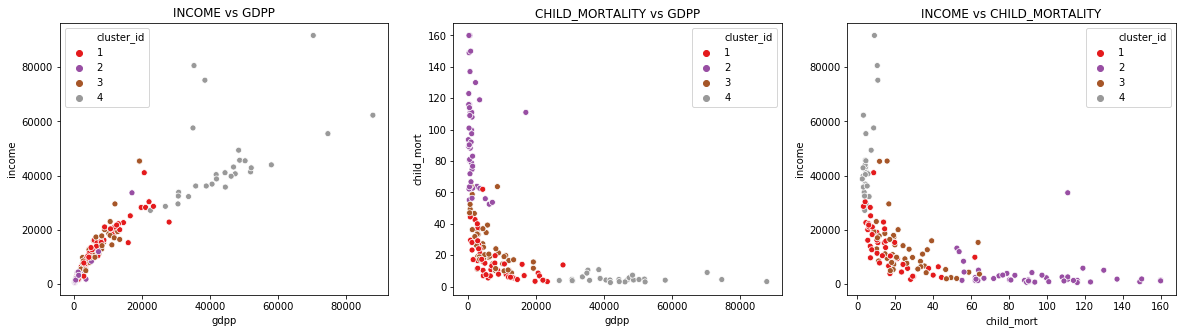

In [503]:
# Plotting Cluster Level Scatter Plot

fig,axes = plt.subplots(1, 3,figsize=(20,5))
sns.scatterplot(y='income',x = 'gdpp',data = country_df_v2,ax = axes[0],hue = 'cluster_id',palette="Set1")
axes[0].set_title('INCOME vs GDPP')
sns.scatterplot(y='child_mort',x = 'gdpp',data = country_df_v2,ax = axes[1],hue = 'cluster_id',palette="Set1")
axes[1].set_title('CHILD_MORTALITY vs GDPP') 
sns.scatterplot(y='income',x = 'child_mort',data = country_df_v2,ax = axes[2],hue = 'cluster_id',palette="Set1")
axes[2].set_title('INCOME vs CHILD_MORTALITY')

In [504]:
# Model1(K=3) and Model2(K=4) has basic differences in the intermediate data points.. 
#The higher end and the upper end does not have any significant differnce
# HENCE LETS GO WITH K = 3

# There is a clear boundry between clusters with K=3.. 
# Cluster 1 has lowest gdpp and income,health index,life expectancy and highest mortality rate, fertility rate and inflation
# Hence the countries within those clusters require the most funds from the NGO

In [505]:
# Lets Analyse the cluster1 of Model1(K=3) and find out the countries with most need
country_df['country'] = country_df_copy['country']
cluster_df = country_df[country_df['cluster_id']==1]
cluster_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
0,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1,Afghanistan
3,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1,Angola
17,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1,Benin
25,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1,Burkina Faso
26,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,1,Burundi


In [506]:
cluster_df.shape
#47 countries

(47, 11)

In [507]:
# Income Analysis
# List top 10 countries with lowest Income
cluster_df[['country','income']].sort_values(by= 'income',ascending = True).reset_index(drop = True).head(10)

,country,income
0,"Congo, Dem. Rep.",609.0
1,Liberia,700.0
2,Burundi,764.0
3,Niger,814.0
4,Central African Republic,888.0
5,Mozambique,918.0
6,Malawi,1030.0
7,Guinea,1190.0
8,Togo,1210.0
9,Sierra Leone,1220.0


In [508]:
# GDPP Analysis
# List top 10 countries with lowest GDPP
cluster_df[['country','gdpp']].sort_values(by= 'gdpp',ascending = True).reset_index(drop = True).head(10)

,country,gdpp
0,Burundi,231.0
1,Liberia,327.0
2,"Congo, Dem. Rep.",334.0
3,Niger,348.0
4,Sierra Leone,399.0
5,Madagascar,413.0
6,Mozambique,419.0
7,Central African Republic,446.0
8,Malawi,459.0
9,Eritrea,482.0


In [509]:
# Mortality Analysis
# List top 10 countries with Highest Mortality
cluster_df[['country','child_mort']].sort_values(by= 'child_mort',ascending = False).reset_index(drop = True).head(10)

,country,child_mort
0,Sierra Leone,160.0
1,Haiti,160.0
2,Chad,150.0
3,Central African Republic,149.0
4,Mali,137.0
5,Nigeria,130.0
6,Niger,123.0
7,Angola,119.0
8,Burkina Faso,116.0
9,"Congo, Dem. Rep.",116.0


In [510]:
# Now considering the most important factors as Income, GDPP and Child Mortality 
# Primary KPI being the GDPP as it's the most important economic factor for every country
'''
1.Burundi
2.Liberia
3.Congo, Dem. Rep.
4.Niger
5.Sierra Leone
'''

'\n1.Burundi\n2.Liberia\n3.Congo, Dem. Rep.\n4.Niger\n5.Sierra Leone\n'

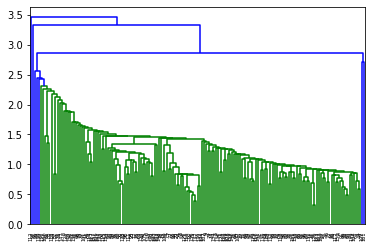

In [511]:
#  Hierarchical Clustering
country_df_v3 = country_df.copy() 
# single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()    

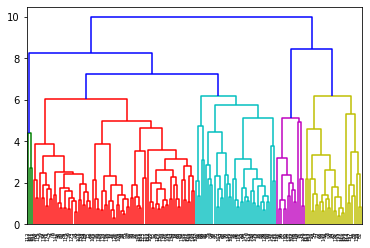

In [512]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [513]:
#Lets keep cluster = 3
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels = cluster_labels+1 
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1])

In [514]:
# assign cluster labels
country_df_v3 = country_df_v3.drop('cluster_id',axis = 1)
country_df_v3['cluster_labels'] = cluster_labels
country_df_v3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_labels
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Afghanistan,1
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Albania,1
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Algeria,1
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Angola,1
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Antigua and Barbuda,1


In [515]:
# Count of Countries in each cluster
country_df_v3['cluster_labels'].value_counts()

1    123
2     28
3     14
Name: cluster_labels, dtype: int64

   cluster_labels        income
0               1   8686.772358
1               2  45010.714286
2               3  24092.142857


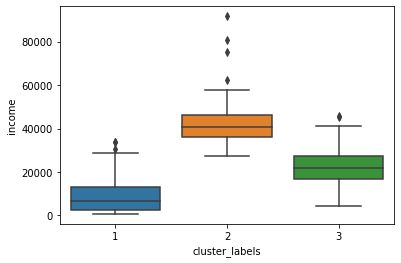

In [516]:
# Avg of clusters based on income
print(country_df_v3.pivot_table(index= 'cluster_labels', values=['income'],aggfunc = np.mean).reset_index().head(10))
# Cluster 1 has Countries with lowest income
# plot
sns.boxplot(x='cluster_labels', y='income', data=country_df_v3)

   cluster_labels  child_mort
0               1   48.970732
1               2    6.325000
2               3    9.785714


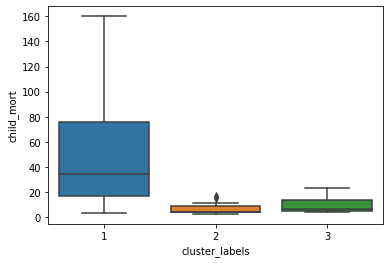

In [517]:
# Avg of clusters based on child mortality
print(country_df_v3.pivot_table(index= 'cluster_labels', values=['child_mort'],aggfunc = np.mean).reset_index().head(10))
# Cluster 1 has Countries with highest child mortality
# plot
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df_v3)

   cluster_labels          gdpp
0               1   4873.772358
1               2  41132.142857
2               3  18731.428571


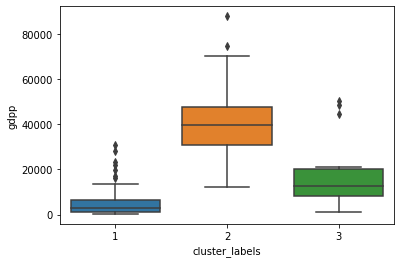

In [518]:
# Avg of clusters based on gdpp
print(country_df_v3.pivot_table(index= 'cluster_labels', values=['gdpp'],aggfunc = np.mean).reset_index().head(10))
# Cluster 1 has Countries with lowest gdpp
# plot
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df_v3)

Text(0.5, 1.0, 'INCOME vs CHILD_MORTALITY')

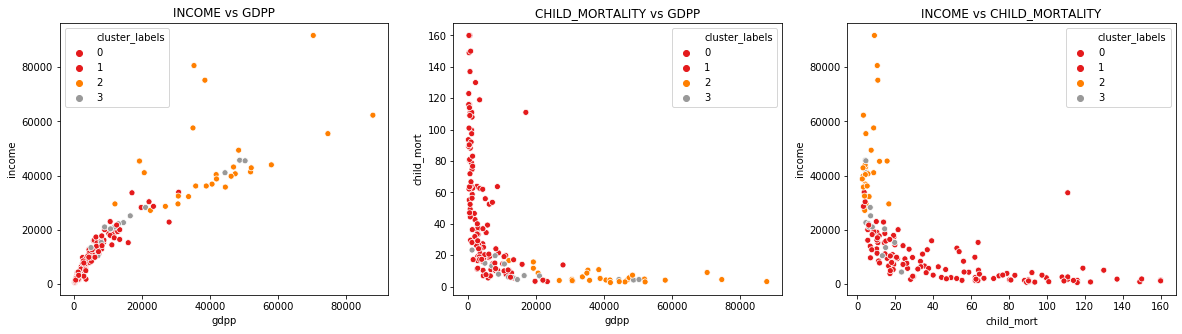

In [519]:
# Plotting Cluster Level Scatter Plot

fig,axes = plt.subplots(1, 3,figsize=(20,5))
sns.scatterplot(y='income',x = 'gdpp',data = country_df_v3,ax = axes[0],hue = 'cluster_labels',palette="Set1")
axes[0].set_title('INCOME vs GDPP')
sns.scatterplot(y='child_mort',x = 'gdpp',data = country_df_v3,ax = axes[1],hue = 'cluster_labels',palette="Set1")
axes[1].set_title('CHILD_MORTALITY vs GDPP') 
sns.scatterplot(y='income',x = 'child_mort',data = country_df_v3,ax = axes[2],hue = 'cluster_labels',palette="Set1")
axes[2].set_title('INCOME vs CHILD_MORTALITY')

In [520]:
# Select countries in cluster 1
cluster_label_df = country_df_v3[country_df_v3['cluster_labels']==1]
cluster_label_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_labels
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Afghanistan,1
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Albania,1
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Algeria,1
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Angola,1
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Antigua and Barbuda,1


In [521]:
# GDPP Analysis
# List top 10 countries with lowest GDPP
cluster_label_df[['country','gdpp']].sort_values(by= 'gdpp',ascending = True).reset_index(drop = True).head(10)

,country,gdpp
0,Burundi,231.0
1,Liberia,327.0
2,"Congo, Dem. Rep.",334.0
3,Niger,348.0
4,Sierra Leone,399.0
5,Madagascar,413.0
6,Mozambique,419.0
7,Central African Republic,446.0
8,Malawi,459.0
9,Eritrea,482.0


In [522]:
# Income Analysis
# List top 10 countries with lowest Income
cluster_label_df[['country','income']].sort_values(by= 'income',ascending = True).reset_index(drop = True).head(10)

,country,income
0,"Congo, Dem. Rep.",609.0
1,Liberia,700.0
2,Burundi,764.0
3,Niger,814.0
4,Central African Republic,888.0
5,Mozambique,918.0
6,Malawi,1030.0
7,Guinea,1190.0
8,Togo,1210.0
9,Sierra Leone,1220.0


In [523]:
# Child Mortality Analysis
# List top 10 countries with Highest Child Mortality Rate
cluster_label_df[['country','child_mort']].sort_values(by= 'child_mort',ascending = False).reset_index(drop = True).head(10)

,country,child_mort
0,Sierra Leone,160.0
1,Haiti,160.0
2,Chad,150.0
3,Central African Republic,149.0
4,Mali,137.0
5,Nigeria,130.0
6,Niger,123.0
7,Angola,119.0
8,"Congo, Dem. Rep.",116.0
9,Burkina Faso,116.0


In [524]:
# Now considering the most important factors as Income, GDPP and Child Mortality 
# Primary KPI being the GDPP as it's the most important economic factor for every country
'''
1.Burundi
2.Liberia
3.Congo, Dem. Rep.
4.Niger
5.Sierra Leone
'''

'\n1.Burundi\n2.Liberia\n3.Congo, Dem. Rep.\n4.Niger\n5.Sierra Leone\n'

In [525]:
# Ending Remarks
'''
1. In both the clustering techinques(K-Means & Hierarical), the optimum number of clusters are 3
2. Contries are basically divided as High Growth Countries(High Income and High GDPP), Medium Growth Countries(Medium Income and Medium GDPP) and Low Growth Countries(Low Income and Low GDPP)
3. In the 3 clusters, other factors also vary mostly according to gdp and income. For eg, if gdp is good, the health index and life expectancy will also be good
4. Although the number of countries in each cluster is different in the 2 methods,the 5 countries with die needs of resources and money are same from both clusters
'''

'\n1. In both the clustering techinques(K-Means & Hierarical), the optimum number of clusters are 3\n2. Contries are basically divided as High Growth Countries(High Income and High GDPP), Medium Growth Countries(Medium Income and Medium GDPP) and Low Growth Countries(Low Income and Low GDPP)\n3. In the 3 clusters, other factors also vary mostly according to gdp and income. For eg, if gdp is good, the health index and life expectancy will also be good\n4. Although the number of countries in each cluster is different in the 2 methods,the 5 countries with die needs of resources and money are same from both clusters\n'